### ERPA methods

Definitions  

o: occupied spinorbitlas  

v: virtual spinorbitlas

The energy of a system can be evaluated as:  
$$
E[\gamma, \Gamma] = \sum_{pq} h_{pq} \gamma_{pq} + \frac{1}{2} \sum_{pqrs} <pq|rs>\Gamma_{pqrs} + E_{nuc}
$$

where the level of electron correlation accounted for depends on the RDMs.

Starting from a not fully correlated method (or an uncorrelated one, e.g. HF) one can add correlation to the two particle reduced density matrix thorugh particle-hole RPA solutions:

\begin{align*}
\Gamma_{pqrs} &= <| a^{\dagger}_p a^{\dagger}_q a_s a_r|> \\
&= - \delta_{qr} \gamma_{ps} + \gamma_{pr} \gamma_{qs} + \sum_{\lambda \ne 0} (<|a^{\dagger}_p a_r|\Psi_\lambda><\Psi_\lambda|a^{\dagger}_q a_s|>)
\end{align*}

where the particle-hole resolution of the identity is used

if $|> \approx |\Psi^{HF}_0>$
$$
\Gamma^{HF}_{pqrs} = - \delta_{qr} \gamma_{ps} + \gamma_{pr} \gamma_{qs}
$$

then:
$$
E^{HF}[\gamma, \Gamma] = \sum_{pq} h_{pq} \gamma_{pq} + \frac{1}{2} \sum_{pqrs} <pq|rs>\Gamma^{HF}_{pqrs} + E_{nuc}
$$

and
$$
E^{phRPA}[\gamma, \Gamma] = E^{HF} + \frac{1}{2} \sum_{pqrs} <pq|rs> \sum_{\lambda \ne 0} (<\Psi^{HF}_0|a^{\dagger}_p a_r|\Psi_\lambda><\Psi_\lambda|a^{\dagger}_q a_s|\Psi^{HF}_0>)
$$

the transition density matrix is evaluated from ph-EOM solutions as:
$$
<|a^{\dagger}_p a_q|\Psi_\lambda> = (<\Psi_\lambda|a^{\dagger}_q a_p|>)^\dag = <|[a^{\dagger}_p a_q, \hat{Q}_\lambda]|>
$$

$$
\hat{Q}_\lambda = \sum_{ij} c_{ij;\lambda} a^{\dagger}_i a_j
$$

\begin{align*}
<|[a^{\dagger}_p a_q, \hat{Q}_\lambda]|> &\approx \sum_{ij} c_{ij;\lambda} <|[a^{\dagger}_p a_q, a^{\dagger}_i a_j]|>\\
&= \sum_{ij} c_{ij;\lambda} (<|a^{\dagger}_p a_q a^{\dagger}_i a_j|> - <|a^{\dagger}_i a_j a^{\dagger}_p a_q|>)
\end{align*}



$$
<|[a^{\dagger}_p a_q, \hat{Q}_\lambda]|> \approx \begin{cases}
      \sum_{ij} c_{ij;\lambda} <|a^{\dagger}_p a_q a^{\dagger}_i a_j|> \delta_{pj} \delta_{qi} & \text{for p,j} \in o; \text{for q,i} \in v\\
      -\sum_{ij} c_{ij;\lambda} <|a^{\dagger}_i a_j a^{\dagger}_p a_q |> \delta_{pj} \delta_{qi} & \text{for p,j} \in v; \text{for q,i} \in o 
     \end{cases}
$$

Alternatively, 
$$
E^{phRPA}[w] = E^{HF} + E^{f-phRPA}_c
$$
the RPA correlation energy , $E^{f-phRPA}_c$, is given by:  
$$
E^{f-phRPA}_c = \frac{1}{4}(\sum_{w>0} w -Tr(A))
$$

where
$$
A_{ia,jb}=\delta_{ij}\delta_{ab}(\epsilon_a - \epsilon_i) + <aj||ib>
$$
from Eqs 6. and 7. in [Tahir 2019](https://doi.org/10.1103/PhysRevB.99.195149).

Then, I want to compare $E^{phRPA}[\gamma, \Gamma]$ and $E^{phRPA}[w]$

Numerical analysis:

System: $H_2$ (disociation path).  
 
I'll use PySCF's ph-RPA/TDHF implementation to evaluate $E^{phRPA}[w]$. 
Their code only allows transitions that conserve the spin, so this is one element of difference with our implementation of ph-RPA (generalized).

Basis set: STO-6G (so that there are fewer transition states and the comparison be easier). 

In [7]:
# Import modules
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot
import csv

In [4]:
def plot_disoc(bonds, ehf, ecc, ephrpa, erdm, system, ylabel, ref='uhf', xunits='Bohr'):
    reflabel = {'uhf': 'UHF', 'hf': 'RHF'}
    # pyplot.rc('font', family='serif')
    pyplot.rc('xtick', labelsize='x-small')
    pyplot.rc('ytick', labelsize='x-small')
    # Create figure and add axis
    fig = pyplot.figure(figsize=(4, 3))
    ax = fig.add_subplot(1, 1, 1)
    # Add plots
    ax.plot(bonds, ehf, marker='o', color="blue", label="UHF")
    ax.plot(bonds, ecc, marker='*', color="green", label="CCSD")
    ax.plot(bonds, ephrpa, marker='x', color="brown", label="EphRPA_w")
    ax.plot(bonds, erdm, marker='s', color="black", label="EphRDM_G")
    # Set the x axis
    ax.set_xlabel('Bond distance (a.u.)')
    # Set the y axis label of the current axis.
    ax.set_ylabel('Energy (Ha)')
    # Set a title of the current axes.
    ax.set_title(f'{system} disociation, {BASIS}, ref {reflabel[ref]}')
    # show a legend on the plot
    ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
    # Edit the major and minor ticks of the x and y axes
    ax.xaxis.set_tick_params(which='major', size=7, width=1, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=4, width=1, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='out', right='on')
    ax.yaxis.set_tick_params(which='minor', size=4, width=1, direction='out', right='on')
    # Set the axis limits
    ax.set_xlim(1.0, 3.0)
    ax.set_ylim(-1.35, -1)
    # Edit the major and minor tick locations
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
    # ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
    # Display a figure.
    pyplot.show()


def parse_csv(pfile):
    content = list(csv.DictReader(open(fpath, 'r',newline='')))
    DBOND = [float(row['Bond']) for row in content]
    ehf = [float(row[' E(UHF)_T']) for row in content]
    ecc = [float(row[' E(CCSD)_T']) for row in content]
    ephrpa = [float(row[' E(phRPA)_T']) for row in content]
    erdm = [float(row[' E(RDM-ph)_T']) for row in content]
    return DBOND, ehf, ecc, ephrpa, erdm

In [5]:
molec = 'H2'
units= 'Bohr'
BASIS = 'sto-6g'
EOM = 'phEOM'
REFDET = 'uhf'
NEXC = 2
fpath = f'h2_{BASIS}_scuseriaRPA_vs_Erdm.csv' 

DBOND, ehf, ecc, ephrpa, erdm = parse_csv(fpath)

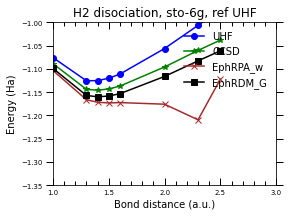

In [8]:
plot_disoc(DBOND, ehf, ecc, ephrpa, erdm, molec, 'Energy (a.u)', ref=REFDET, xunits=units)